Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
# Read train and test dataset 
Dr_train = pd.read_excel('Final_Train.xlsx')
Dr_test = pd.read_excel('Final_Test.xlsx')

In [3]:
Dr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
#nunique() function return Series with number of distinct observations over requested axis
print('Distinct Observation in Dataset: \n ')
print('Qualification:', Dr_train['Qualification'].nunique())
print('Experience:', Dr_train['Experience'].nunique())
print('Rating:', Dr_train['Rating'].nunique())
print('Place:', Dr_train['Place'].nunique())
print('Profile', Dr_train['Profile'].nunique())

Distinct Observation in Dataset: 
 
Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


# Perform Data wrangling

In [5]:
# Replace "years experience" string as it is unrequired in entire Experience column

Dr_train['Experience'] = Dr_train['Experience'].str.replace('years experience','').astype(int)
Dr_test['Experience'] = Dr_test['Experience'].str.replace('years experience','').astype(int)

In [6]:
# Lets fill 0% in rating column where data is missing 
Dr_train['Rating'].fillna('0%', inplace=True)
Dr_test['Rating'].fillna('0%', inplace=True)

In [7]:
#  In re. sub() , specify a regular expression pattern in the first argument,
#A new string in the second argument, and a string to be processed in the third argument

def clean_rating(pattern):
    pattern = re.sub(r'%', '', str(pattern))
    return pattern

In [8]:
Dr_train['Rating'] = Dr_train['Rating'].apply(clean_rating)
Dr_train['Rating'] = Dr_train['Rating'].astype(int)

Dr_test['Rating'] = Dr_test['Rating'].apply(clean_rating)
Dr_test['Rating'] = Dr_test['Rating'].astype(int)

In [9]:
# Fill Place missing fields with missing only 
Dr_train['Place'].fillna('missing', inplace=True)
Dr_test['Place'].fillna('missing', inplace=True)

In [10]:
Dr_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


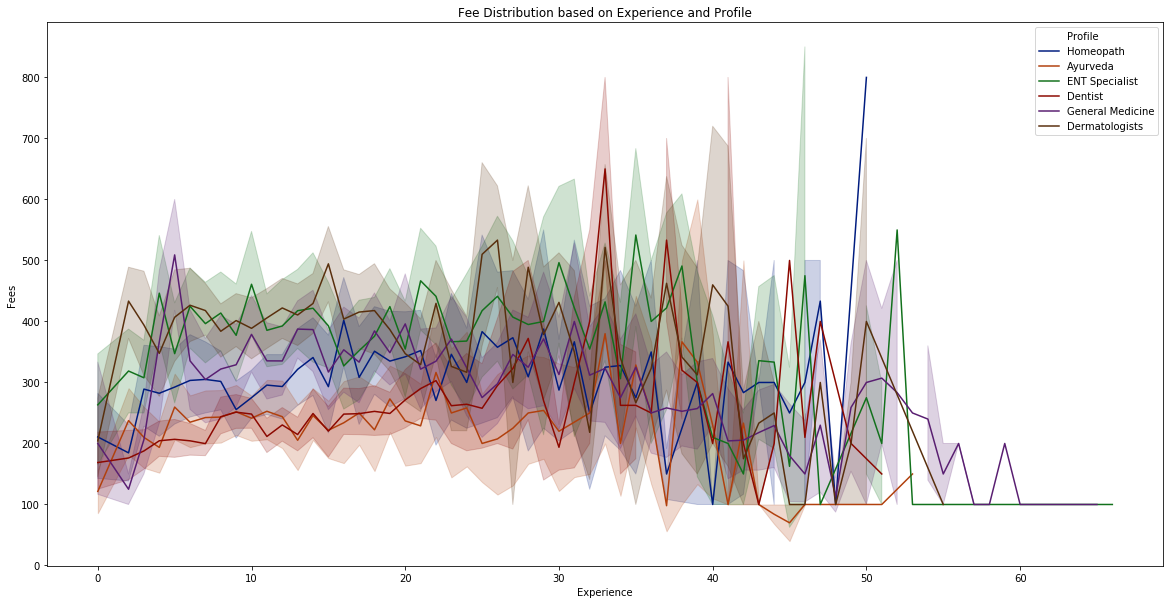

In [11]:
# Line plot  
fig, ax = plt.subplots(figsize=(20, 10))  
sns.lineplot(x='Experience', y='Fees', hue='Profile', data=Dr_train, ax=ax,palette="dark" )  
ax.set_title('Fee Distribution based on Experience and Profile')  
plt.show()

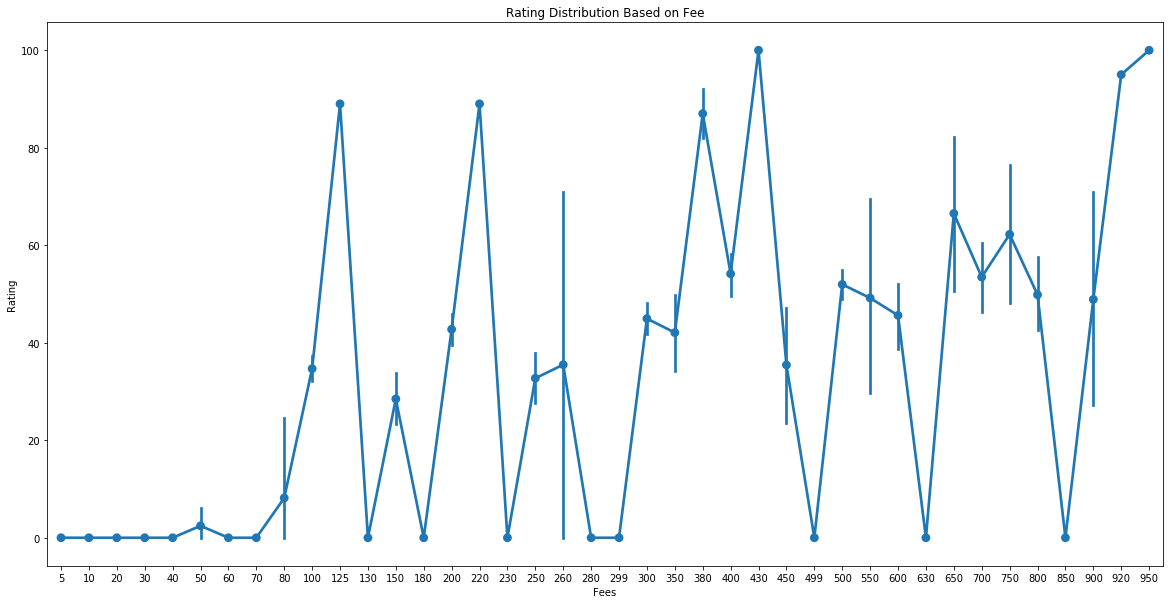

In [12]:
# Point plot  
fig, ax = plt.subplots(figsize=(20, 10))  
sns.pointplot(y='Rating', x='Fees', data=Dr_train, ax=ax )  
ax.set_title('Rating Distribution Based on Fee')  
plt.show()

In [13]:
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
Dr_train = pd.get_dummies(Dr_train, columns=['Profile'])
Dr_test  = pd.get_dummies(Dr_test,  columns=['Profile'])

In [14]:
def clean_txt(txt):
    txt = str(txt).lower()
    txt = re.sub(r'[^a-z]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt)
    return txt

Dr_train['Qualification'] = Dr_train['Qualification'].apply(clean_txt)
Dr_test['Qualification'] = Dr_test['Qualification'].apply(clean_txt)

In [15]:
def clean_place(txt):
    txt = str(txt).lower()
    txt = re.sub(r'[^a-z0-9]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt)
    return txt
Dr_train['Place'] = Dr_train['Place'].apply(clean_txt)
Dr_test['Place'] = Dr_test['Place'].apply(clean_txt)

# Model Training 

In [16]:
x = Dr_train.drop(labels=['Fees', 'Miscellaneous_Info', 'Place', 'Qualification'], axis=1)
y = Dr_train['Fees'].values

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=1)

In [17]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4470, 8), (4470,), (1491, 8), (1491,))

In [18]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [19]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_val)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_val, y_pred1)))

[11:13:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 0.623405098288972


In [20]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 151,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 26, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.63,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 101,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets=[val_data])

y_pred2 = lgbm.predict(x_val)
print('RMSLE:', sqrt(mean_squared_log_error(y_val, y_pred2)))

RMSLE: 0.6272796129796785


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(x_train, y_train)
y_pred3 = gb.predict(x_val)
print('RMSLE:', sqrt(mean_squared_log_error(y_val, y_pred3)))

RMSLE: 0.6625679000067026


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29, #25, 29
                           criterion='mse', 
                           max_depth=58, #55, 58
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20, #0.20, 
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11) 
rf.fit(x_train, y_train)
y_pred4 = rf.predict(x_val)
print('RMSLE:', sqrt(mean_squared_log_error(y_val, y_pred4)))

RMSLE: 0.6721381376866162


In [23]:
from sklearn.ensemble import BaggingRegressor
bgr= BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, #4
                      verbose=0)
bgr.fit(x_train, y_train)
y_pred5 = bgr.predict(x_val)
print('RMSLE:', sqrt(mean_squared_log_error(y_val, y_pred5)))

RMSLE: 0.6562999062934064


Test the model on unseen data  using  XGBRegressor and  Light Gradient Boosting Regressor as these two outperformed among all bagging and boosting techniques opted for the training.

In [24]:
test = Dr_test.drop(labels=[ 'Miscellaneous_Info', 'Place', 'Qualification'], axis=1)

In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(x_train, y_train)
y_pred_Fee_xgb = xgb.predict(test)

[11:13:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val)
param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 151,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 26, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.63,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 101,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets= val_data)

y_pred_Fee_lgbm = lgbm.predict(test)

In [27]:
# Let's print the predictions 
print("Fee predictions from XGB: \n",y_pred_Fee_xgb)
print('\n')
print("Fee predictions from LGBM: \n",y_pred_Fee_lgbm)

Fee predictions from XGB: 
 [261.27548 350.29825 266.92496 ... 243.7834  220.61696 321.75824]


Fee predictions from LGBM: 
 [216.65636454 292.91897705 309.15105966 ... 277.12241001 246.04430725
 355.20913852]


Write Predictions in output Xlsx file 

In [28]:
df_sub = pd.DataFrame(data=y_pred_Fee_xgb, columns=['Fees'])
writer = pd.ExcelWriter('output_Fee.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()